<a href="https://colab.research.google.com/github/NikolayLenkovNikolaev/SoftUni/blob/main/Presentation_1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will talk about Time-to-Event or Survival models. The models are a special kind of model where we care about the time to the occurrence of an event, such as the time from start of promotion to real selling, or the time from seling to reseling. This is a common question that many want to answer for their clients, such as, how likely am I to bay a new car the next five years or the next 10 years? We will look at how models are an extension of the prognostic/forcasting models you have already know. Finally, we will look at how we can use data to build these models.

## 1.1. The Survival Function

The  question of what is the probability of survival past any time $(t)$.

The **survival function**, a key tool in survival analysis, which will help us answer this question.

So in the prognostic setup we have looked at thus far, we have asked questions of the form, what is the probability of death for a patient in five years?

And so we built a model that says in five years, what is the probability of death?

Now, that is very closely related to another question which is, what is the probability of survival past five years?

And this can be simply computed from this first quantity over here.

So let's say our probability of death in five years was 0.2 or 20%, then the probability of survival past five years is simply one minus the probability of death in five years.

Probability = 0.2 or 20%

$1-P(\text{event in 5 t.u})= 0.8$

And so we ask questions of this form thus far.

Survival models are going to extend that question to say, what is the probability of survival past any time $t$?

So this is not just five years, but any time $t$ could be one year from now or 10 years from now.

The key trick here is that earlier, if we wanted to build a model for a different time horizon, let's say we didn't care about five years anymore but we cared about 10 years or one year, we'd have to build three separate models for the patient.

But the trick to survival models is survival models that can answer questions of the form, what is the probability that the time to death is greater than two years?

$$P(\text{time to event} > 2 t.u)  = 0.8$$
$$P(\text{time to event} > 5 t.u.)  = 0.7$$
$$P(\text{time to event} > 10 y.u) = 0.5$$

So we can see for this patient, the probability that their time to death is greater than two years is 0.8 as outputted by the survival model, for five years is 0.7, and for 10 years is 0.5, all outputted by that one single model.

The key quantity for sure is this, what is the probability that the time to death is greater than some number of years. This is what we cared in survival models, the probability that time is greater than some quantity, and that is called the survival function.

The survival function is a function that's defined for every time point $t$.

$$ S(t)= P(T > t)$$



## 1.2. The Valid Survival Function:



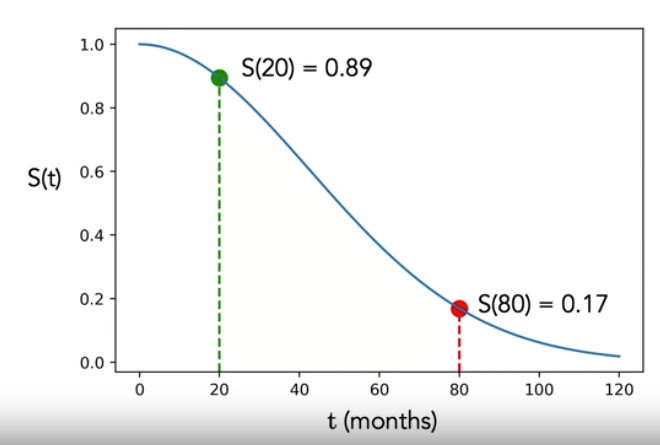

So we have a survival model, which is looking at a patient and outputs the survival function, which is the probability that the time to an event is greater than small t, where the small t could take on any value like 1 year, 5 years, 10 years.

So now we can graphically represent the survival function, where on the x-axis, we will have our time. And this time could be days, months, or years.

And on our y-axis is going to be the survival probability at that time $t$.

So we have time $t$ here, and this is going to be $S(t)$. Let's talk about a few properties of the survival function.

Properties:
1. So the first property is that the survival at any time $u$ is going to be smaller than or equal to survival at any time $v$, if $u$ is greater than or equal to $v$.

$$S(u) \leq S(v)$$  $$  \text{if } u \geq v$$

So what does this mean?

- S(20) = 0.89
- S(80) = 0.17

then $$0.17 \leq 0.89$$
- u = 80
- v = 20

Then: $80 \geq 20$

Let's first pick u to be 80, and we know 80 is greater than equal to 20.

And we can read off on 80, our survival probability was 0.17.

And our survival probability at time v, which is 20, was 0.89.

The survival probability should never go up.

It can either stay the same or it can go down.

2. The second property is that the survival function usually starts off with a survival probability of 1.

$$
\begin{equation}
  S(t)=\begin{cases}
    1, & \text{if $t= 0$}\\
    0, & \text{if $t =\infty$}
  \end{cases}
\end{equation}
$$

There are cases where it doesn't, but we'll mainly focus on this.

The second property is that as time extends on to infinity, our survival probability should get to 0.

And so our survival function should start at a probability of 1 and eventually get to 0.

This particular survival function is going down as time is going on, and starts at 1. So this seems to be a valid survival function. This one over here also starts at 1, seems to be going down. Notice that here it gets to 0. Now, this might initially seem like not a survival function because it doesn't wait till infinity to get to 0, but that's all right. It will stay at 0 as time goes on, and so this is also a valid survival function.



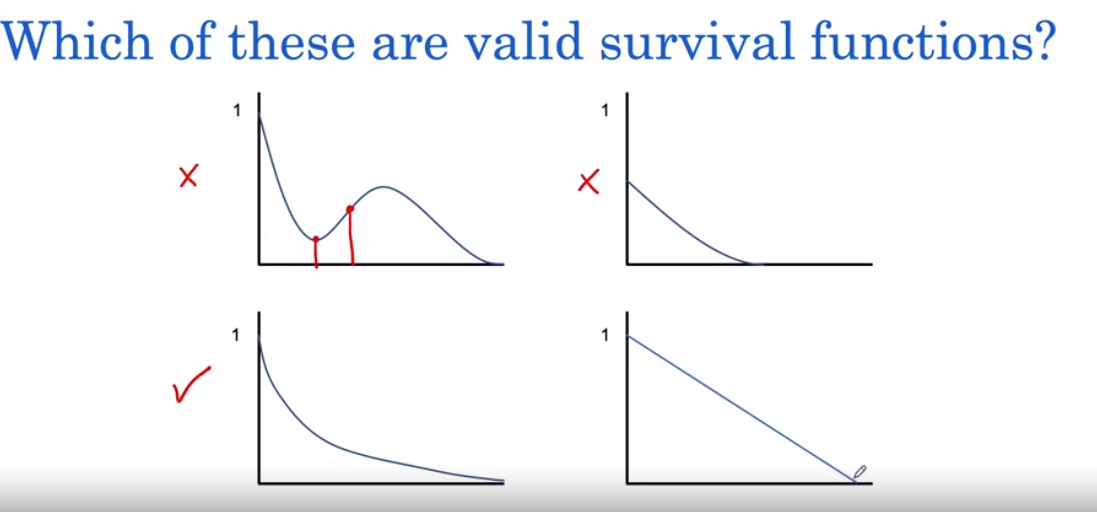

# 2. TIME-to-EVENT

## 2.1. Collecting Time Data

In order to be able to model survival, we need to be able to represent the data in a form which we can process.

The primary challenge is censored observations, which is a particular form of missing data that we will look at next.

Now, previously when we looked at prognostic models where we ask the question, what is the probability of survival past five years?

We had data which looked like the following format, where we had a bunch of patients and for each patient we had their outcome information which said, did I have an event, did I not?


Prognostic models Data- Classification:
- What is the probabilitues of survival past 5 years?

|i|$Y_i$|
|---|---|
|1|1|
|2|0|
|3|0|
|4|1|
|5|0|

- Need : Yes or Not
- 1 - Yes
- 0 - No

So previously we used one for that patient had an event and 0 for that patient did not have an event here presumably in five years.

So that was the data that we used and this was the outcome data that we were using.

Notice the key thing here was that the answers we needed, the outcome we needed, were basically yes or no.

There were ones or zeros that's specified whether there was an event that happened in five years.

But now when we are dealing with survival data, we want to answer a different question.

We want to answer the question, what is the probability of survival not just past five years, but past any time t?

To be able to do that, so we are going to need one information. Let's look at how we can acquire that when information for patients with an example.

Survival Model Data:
- What is the probabilities of survival past any time **t**?

- need WHEN

|1|$Y_i$|
|---|---|
|1||
|2||
|3||


- Treatment Given ----> Stroke Event
- Sep2018  ---> Sep 2019 = Stroke     = 12  monts
- Aug 2018 ---> Oct 2019 = Study Ends = 14 months +
- Aug 2018 ---> Nov 2018 = Withdrow   = 3+ months


|1|$Y_i$|
|---|---|
|1|12|
|2|14+|
|3|3+|

- 2 and 3 - censoring



## 2.2. When a EVENT is Not Observed

(start)0------------------0(Event)

So for the example, we're going to be looking at patients who got a treatment, and we were monitoring them for a some event.

And seeing how much time passed between the treatment till when they got the stroke, if they had a stroke.

And so we have our first patient who got their treatment in September of 2018 and they had a stroke exactly after a year in September 2019.

So for this patient, let's say we were tracking the number of months.

This would be equivalent to 12 months since the time of treatment to having a stroke event.

And so we would enter in this table with the number of months that have passed, that is 12.

Let's look at another patient.

So for this patient, they had their treatment in August 2018 and we tracked them for over a year, until, in October 2019, we decided that our study was going to end. And we did not observe any stroke event during this time period.

So this is August 2018 to August 2019; that's 12 months.

Then September and October, so that's 14 months, where we didn't observe the patient have an event.

So we can say 14 months. But since we know that the patient didn't have an event in 14 months, we know that if they had an event it would have been after 14 months.

And so we write a 14+ there. For our third example this patient had a treatment in August 2018 and just three months later in November 2018 decided that they have to withdraw from the study.

And this happens very commonly for a multitude of reasons. Let's say this patient had to switch countries and therefore had to drop out of the study.

So we know that between August 2018 and November 2018, they did not have a stroke, but we don't know what happened after that.

So we're going to say this patient's time is 3+ months. And so we enter that into a table.

Now the second and this third case is what we call censoring.

And censoring is an important part of survival data which needs to be accounted for.

And something we see all the time where we're trying to see the time to a particular event happening.

But we might not see that event happening for one of a few reasons. And we'll talk about those reasons just in a bit.

For now, all that's important to understand is that there is this censoring observation that we'll have in survival data.




## 2.3. Example



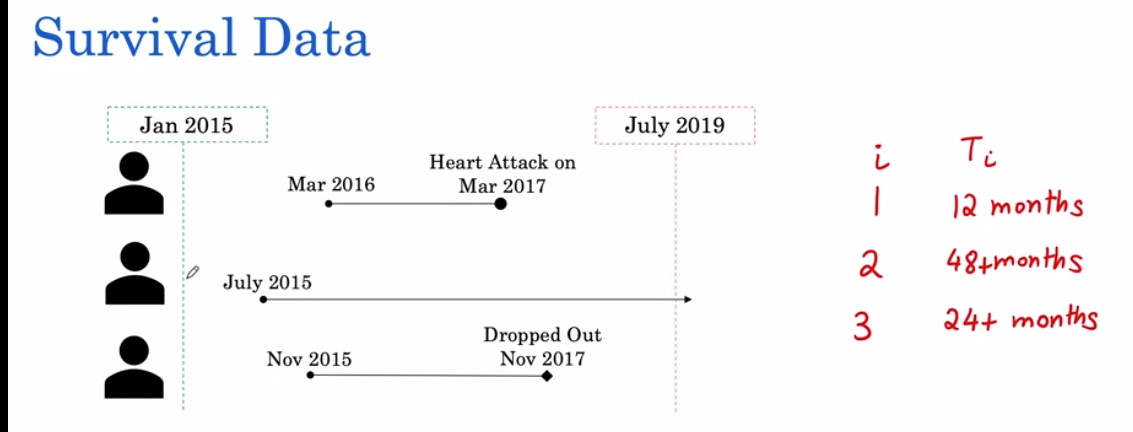

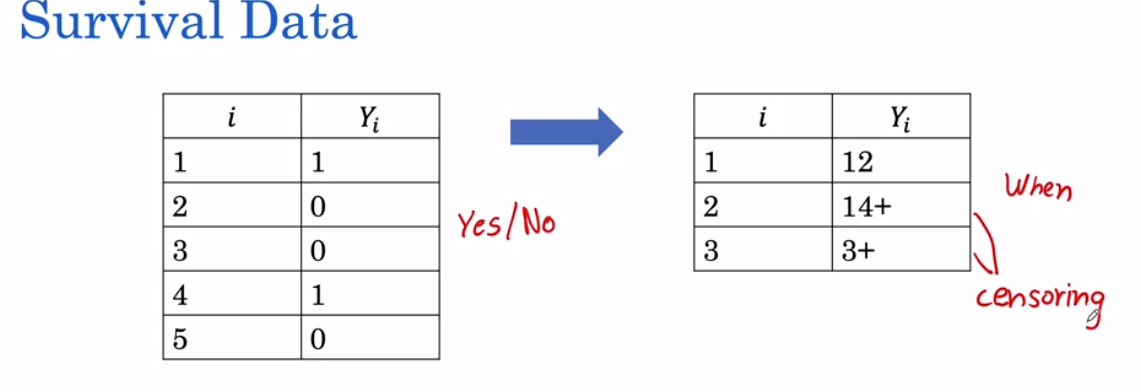

## 2.4. Right Censoring


Aug2018---> Nov2018(Lat Contact)---> Jan2019(Event/Never Gas event/Event always after , if any) == Right censoring

- The time to event i sonly known to exceed a certain value.

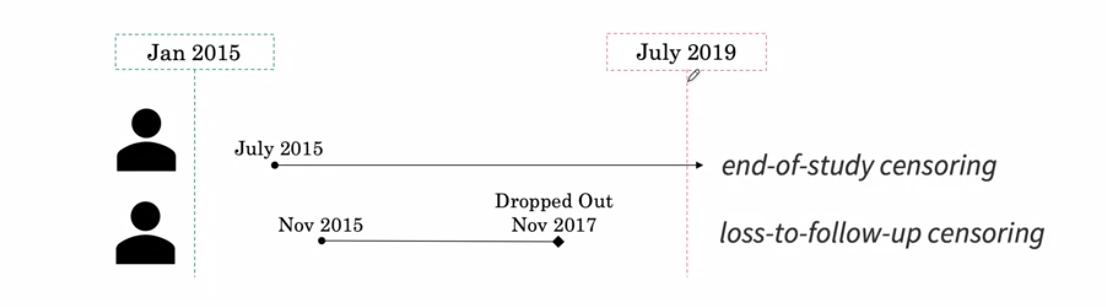

And there are two types of Right Censoring that we've looked at: the first, in which we had a patient who was censored because our study ended, and this is called the end-of-study censoring; and the second type, where we had a patient drop out before the end of the study, and this is called loss-to-follow-up censoring.

Now, censoring is a very important concept in survival data and one that's very necessary to understand to be able to build survival models that we'll look at soon.

# Estimate Survival with Censored Data


## 3.1. Estimating the Survival Function

We'll look at estimating the survival function.

So recall that we've seen survival models where we have patients.

And for those patients, the survival model will tell us the survival function, which is $S(t)$, which can be graphically shown as the following, where for each point in time, we can tell what the survival probability is.

And the survival probability, remember, is just the probability that the time to an event is after some small $t$, where that small $t$ can be one year, it can be five years, it can be 10 years, whatever time we care about.

And we've looked at survival data, where for survival data we have a set of patients for whom we have the outcome information collected in the form of when.

So what was the time to an event? And here we have some observations where we observed the event, and some where we don't observe the event, which we've looked at as being our right-censored data and we have a few of those right-censored observations here.

So we're going to use information that looks like of this form to estimate a survival function.

And we're not building individualized survival functions right now, per patient, we'll look at how to do that later. But right now for any person in the population, we're going to apply the same survival curve that's going to just say for every time t, what is my probability of survival?

And we can read that off from the graph, just one survival function that we apply to the whole population.

## 3.2. Died Immediaterly or Never die

**Estimating Survival**
- what is the probability of survival to t months?
- t=25 months

$S(25)=P(T> 25) = \frac{\text{num.survived to 25 months}}{\text{hurn patients}}$

- pz.survived = 3 and 6 => 2/7 = 0.29

- die emmediately: never dies= 5/7=0.71


|i|$T_i$|S(25)=P(T> 25)|
|---|---||
|1  |10 ||
|2  |8+ |
|3  |60 |
|4  |20 |
|5  |12+|
|6  |30 |
|7  |15+|


And so, we're going to try to model what is the probability of survival to t months.

And for our example, we're going to fix t. Let's take t to be equal to 25 months.

And we're going to look at s at 25, which is simply, remember, the probability that the time to an event happens after 25 months.

And this is the probability of survival to 25 months.

And we can estimate this from the data-- we'll say the way we'll estimate this from the data is by saying the num that survive to 25 months.

And we'll look at the fraction that survive to 25 months by dividing this value by the number of patients that we have in our data.

So let's look at the number that survive to 25 months. We know patient three survived to 25 months. We also know patient 6 survived to 25 months, and the way we know that is that their event times are greater than 25.

Unfortunately, the thing that's making this estimate complicated is that we have these right-censored observations.

Now remember that the problem with the right-censored observations is that we don't know when they had an event; if they had an event at all, we have this lower bound on the time to the event.

And so we have to make an assumption here, and let's try out both the assumptions.

Assumptions:
1. The first assumption that we can make for the censored observations is that they die immediately.

And so, if we have someone who is censored at eight months, let's assume right after we had contact with them, they die. And so the number survive to 25 months, in that case, is only going to include patients three and six, and our denominator is going to be all of the patients, which is going to be 7.

And this estimate comes out to around 0.29. So this is the first assumption where we assume that everyone who is censored just dies immediately.

2. The second assumption we can make is that everyone who's censored never dies.

So patients two, five, and seven just live on forever-- definitely beyond 25 months.

And so we now have three other patients who make it past 25 months, along with their original two patients.

And so our updated estimate is five patients over seven patients, which comes out to a probability of 0.71.

So notice that if we assume that these censored observations all die immediately, the survival probability is much smaller than if we assume that they never die.

Now we know that the reality of the matter is somewhere in between these two values.

## 3.3.Something in-between


|i|$T_i$|Real|
|---|---|---|
|1  |10 |10|
|2  |8+ |*26*|
|3  |60 |60|
|4  |20 |20|
|5  |12+|*51*|
|6  |30 |30|
|7  |15+|*17*|

- S(25)= 4/7=
- Previously" 2/7 = 0.29 and 5/7=0.71

!!! - How to estimate probability of survival past 25 months with censored observations?



So let's assume that we could call up these patients, and we could somehow find out what happened to these censored observations.

So we make some calls, and we can get the real values for these patients, and we see that two of them are greater than 25, one of them is smaller than 25. We can now have our new estimate of our survival at 25, which includes this real information.

And this is going to have the number of patients who survived to 25, and so that's going to be patients 2, 3, 5, and 6. So that's four patients out of seven in total.

And notice that our previous numbers that we had were two over seven, if we assume everyone died immediately, and five over seven, if we assume that the censored observations never experienced the event.

And the reality seems to be somewhere in between that, in between those numbers, where two out of the three patients survived beyond 25 and the one other didn't.

This isn't a problem that shows up all the time, and we unfortunately aren't always able to acquire the reality for the censored observations.

So in that case, we face a very important question that we have to answer with survival models is: how do we estimate the probability of survival past some time t, here 25 months, when we have censored observations without actually making calls to find out what the real event time was?

In [1]:
import numpy as np
import pandas as pd

We'll work with data where:
- Time: days after a disease is diagnosed and the patient either dies or left the hospital's supervision.
- Event:
    - 1 if the patient died
    - 0 if the patient was not observed to die beyond the given 'Time' (their data is censored)

In [2]:
df = pd.DataFrame({'Time': [10,8,60,20,12,30,15],
                   'Event': [1,0,1,1,0,1,0]
                  })
df

,Time,Event
0,10,1
1,8,0
2,60,1
3,20,1
4,12,0
5,30,1
6,15,0


1. Count Number of Censored Patients

In [3]:
df['Event'] == 0

0    False
1     True
2    False
3    False
4     True
5    False
6     True
Name: Event, dtype: bool

Patient 1, 4 and 6 were censored.

- Count how many patient records were censored

When we sum a series of booleans, `True` is treated as 1 and `False` is treated as 0.

In [4]:
sum(df['Event'] == 0)

3

## Count Number of Patients Who Definitely Survived Past Time $t$

This assumes that any patient who was censored died at the time of being censored ( **died immediately**).

If a patient survived past time `t`:
- Their `Time` of event should be greater than `t`.  
- Notice that they can have an `Event` of either 1 or 0.  What matters is their `Time` value.

In [5]:
t = 25
df['Time'] > t

0    False
1    False
2     True
3    False
4    False
5     True
6    False
Name: Time, dtype: bool

In [6]:
sum(df['Time'] > t)

2

## Count Number of Patients Who May Have Survived Past Time $t$

This assumes that censored patients **never die**.
- The patient is censored at any time and we assume that they live forever.
- The patient died (`Event` is 1) but after time `t`

In [7]:
t = 25
(df['Time'] > t) | (df['Event'] == 0)

0    False
1     True
2     True
3    False
4     True
5     True
6     True
dtype: bool

## Count Number of Patients Who were Not Censored Before Time $t$

If patient was not censored before time `t`:
- They either had an event (death) before `t`, at `t`, or after `t` (any time)
- Or, their `Time` occurs after time `t` (they may have either died or been censored at a later time after `t`)

In [8]:
t = 25
(df['Event'] == 1) | (df['Time'] > t)

0     True
1    False
2     True
3     True
4    False
5     True
6    False
dtype: bool

In [9]:
sum( (df['Event'] == 1) | (df['Time'] > t) )

4

## 3.4. Using Censored Data:
0----1----...----25(event)----26 ->

- How to estimate probability of survival past 25 months with censored observations?
$S(25)=P(T> 25)= P(T\geq 26)= P(T\geq 26, T\geq 25, T\geq 24, ..., T\geq 0 )$


|i|$T_i$|
|---|---|
|1  |10 |
|2  |8+ |
|3  |60 |
|4  |20 |
|5  |12+|
|6  |30 |
|7  |15+|

So we're going to estimate the probability of survival past 25 months with censored observations.

And so, we'll start off with a number line, where we have time points from zero, one, all the way to 25 and beyond.

And notice that we're considering discrete points in time, such that our events are happening at either one or two or three; they're not happening in between.

And so, we'll start by estimating the probability of survival past 25 months with censored observations, by writing down what this means.

So we have S of 25, which is the probability that our time to an event is after 25.

Now, notice that if an event happens after 25, that means it happens after or at 26.

So we can have that modification that we make, and we'll see why this is useful in just a second.

Now, the probability that the time to the event is after or at 26 months, and we're going to expand this out. What does it mean for the time to an event to be after or at 26?

It means the same thing as the time to event happened after 26 and after 25, and after 24, all the way to it happening right after or at zero.

The reason we can do this is because this implies this. So we know that the time to an event, if it happens after or at 26, all the following must hold true.

## 3.5. Chain Rule of Conditional Probability

So we have our S(25) as the probability that T is greater than equal to 26, greater than equal to 25 so on and so forth, up to zero.

And the reason we got it to this stage is now we can use the chain rule of conditional probability to break this down even further.

And so we can use the chain rule of conditional probability which remember just says the probability of two events and be occurring is the probability of A occurring given B times the probability of B occurring.

And this can be expanded out to multiple events A, B and C. And this is going to come out to the probability of A given B,C times the probability of B given C times the probability of C.

We just want to know that this exists and we can apply it to this formulation right here to break it down.

And the way we'll break it down is to say this is the same as the probability that T is greater than equal to 26, given T is greater than equal to 25 times the probability that T.

Is greater than equal to 25 given T is greater than equal to 24, so on and so forth until we reach P(T) is greater than equal to one, given T is greater than equal to zero.

Finally times P of T is created than equal to zero as our final term on there.

And so we've just applied the chain rule of conditional probability to simplify this expression into that one. Now we know that all events happen at or after zero, so this term is just going to end up being one, and we don't really need to include this term in our multiplication.

- if event is in 26 moths
$S(25)=P(T> 25)= P(T\geq 26)= P(T\geq 26, T\geq 25, T\geq 24, ..., T\geq 0 )$

- $P(A,B)= P(A|B)P(B)$
- $P(A,B,C)= P(A|B,C)P(B|C)P(C)$

- $P(T \geq 26|T\geq 25)P(T\geq25|T\geq24)...P(T\geq1|T\geq0)P(T\geq0)$

## 3.6. Deriving Survival:

So we've represented the survival probability in this following expression, that's saying the probability that I survive to 25 is a product of a bunch of probabilities, which says, if I get to 25, what is the probability I get to 26?

Multiply that by what's the probability I get to 25 given I get to 24, so on and so forth, until we get to the start of time where we're asking the question, if we survive 0, what is the probability that we survive 1?

So we're making these little steps on this timeline to get up to the survival probability we care about here, which is 25.

We're going to modify this expression a little more by understanding how this can break down even further.

So we have the probability that T is greater than/equal to 26.

The probability that T is greater than/ equal to 26 is also the probability that T is greater than 25.

We can write this down as the probability that this person has their event after 25, given that they had their event at or after 25.

Now notice that this is simply 1 minus the probability that the event happened exactly at time 25 months, given it happened at or after 25 months.

So let's look at what's happening here.

We're looking at the probability that the event happens after 25 months, given it happens at or after 25 months.

And this is going to be 1 minus the probability that it happens at 25 months, given it happens at or after 25 months.

So we're going to use this to extend this expression a little further to say S of 25 is going to be 1 minus probability of having an event at 25 months, given it happens at or after 25 months, and this is going to be the first term.

And the second term is going to be 1 minus the probability that it happens at 24 months, given it happens at or after 24 months. And so on and so forth until we get to our last term, which is going to be 1 minus the probability that it happens at 0, given it happens at or after 0.

So we're going to see next why it is useful to represent the survival probability in the following way.

- $S(25)= P(T \geq 26|T\geq 25)P(T\geq25|T\geq24)...P(T\geq1|T\geq0)P(T\geq0)$

- If we take that:

- $P(T \geq 26|T\geq 25) = P(T > 25|T\geq 25)= 1-P(T=25|T\geq 25)$

- $S(25)= (1-P(T=25|T\geq25))(1-P(T=24|T\geq24))...(1-P(T=0|T\geq 0))$

## 3.7. Calculating Probabilities from the data

$(1-P(T=25|T\geq25)) -> 1-0 $  

$P(T=25|T\geq25)\frac{\text{# died at 25}}{\text{# know to survive to 25}} = \frac{0}{2} = 0$

$S(25)= (1-P(T=20|T\geq20))(1-P(T=10|T\geq10))=  (1- \frac{1}{3})(1-\frac{1}{6})= \frac{2}{3}* \frac{5}{6}= \frac{10}{18}= 0.56$


So we've seen how we can represent the survival function using the following expression, and the benefit of using this expression is we can directly estimate this quantity from data.

So the probability that the time to event is at a given time can be estimated by looking at the number of patients who died at that time, so the number of patients who died at 25.

In the denominator, we're going to look at the patients who have a time to event at or after 25, so this is going to be the number known to survive to 25.

So we can estimate this quantity directly from data, by looking at the number of patients who died at 25.

And we see that no patients died exactly at time 25, so our numerator is 0.

Now in the denominator, we're looking at the number of patients known to survive to 25.

So scanning through these patients, patient three survives to 25 and patient six is known to survive to 25, because they have event times or censoring times after 25, and so the denominator here is 2.

So we have here 1 minus 0, which is going to come out for 1 for this expression over here, and the reason for this is that we didn't have any patients who died at 25.

And this is going to be true for most times in this expression, we're not going to have patients that died.

In fact, the only two times for which we're going to see patients die before 25, are going to be for patient 1, at a time of 10, and for patient 4, at a time of 20.

So this expression simplifies into computing this expression at those two times, so we have 1 minus the probability T equals 20, given T is at or after 20, times 1 minus the probability that T is equal to 10, given T is at or after 10.

And so we have seen how we can simplify this expression to have these two terms, let's see how we can simplify it even further.

So we can evaluate this first quantity using data by looking at the number of patients who died at 20 in the numerator, that's going to be 1, that's patient four, and in the denominator, the number of patients that are known to have survived to 20, and so we can walk through the patients.

See that patient three has survived up to 20, so is patient four and patient six.

So that's three patients, and we can have the 1 minus this quantity.

And here we have 1 minus; we'll apply the same logic here, when the numerator will look at the number of events at time 10, there's one, and we look at the number of events at or after time 10, so this is 1, 2, 3, 4, 5, 6. So we have 6 here and now we can complete this computation where the first part evaluates the 2 over 3 and the second part to 5 over 6, to get us to 10 over 18.

We can simplify that to 5 over 9, which comes around 0.56.

## 3.8. Comparing Estimates

So we have a new estimate of the survival at time 25, which comes out to 0.56. Let's compare this to the estimates we had previously made. So when we had made the assumption that all patients died immediately at their censoring time, we had got a low survival probability of 0.29. On the other extreme, if we assume that all of the censored observations continued to live to the end of time, then we had a survival estimate of 0.71. We also looked at what would have happened if we had access to the real event times in the data, which is not something we can usually observe, but we had this hypothetical scenario in which we could call up the patients and find out the event times. We had a real estimate that we could compute based on that. We can see that our new estimate, which takes into account censored observations, is much closer to the real estimate than we could get with either of our two extreme observations. So we've seen how we can estimate survival probability in the presence of censored observations. So now that we've seen how to estimate the probability of survival past 25 months with censored observations, let's look at how we can generalize that to any time small t. Let's see if we can generalize this expression we saw earlier to have any time small t. So here we can represent the survival at any point t as a product. We can write in product notation of i, starting at time zero and extending all the way to the time t, and then in this we're going to have 1 minus the probability that the time to an event is at the time i, given it's at or after i. So this is simply writing down for any time t what this expression would look like. So now we've seen how we can directly estimate this quantity from data as the number of patients who died at the time. So the time here is i divided by the number that are known to survive to i. We can have a shorthand notation for the numerator of di and for the denominator as ni, which brings us to this expression for the survival function, which is the survival at time t is the product from i equals 0 to t of 1 minus di over ni.

|i|$T_i$|Real|
|---|---|---|
|1  |10 |10|
|2  |8+ |*26*|
|3  |60 |60|
|4  |20 |20|
|5  |12+|*51*|
|6  |30 |30|
|7  |15+|*17*|

- New estimate= 5/9= 0.56
- if all assumed dead- 2/7 =0.29
- if all assumed alive= 5/7=0.71
- real - 2/7 = 0.57

How to estimate probability of survival past 25 months with censored observations?

- $S(25)= (1-P(T=25|T\geq25))(1-P(T=24|T\geq24))...(1-P(T=0|T\geq 0))$

-$S(t)= \prod_{i=0}^t (1-P(T=i|T\geq i))= \frac{\text{# died at i}}{ \text{# known survive to i}}$

- $S(T)= \prod_{i=0}^t 1-\frac{d_i}{n_i}$


|i|$T_i$|
|---|---|
|1  |10 |
|2  |8+ |
|3  |60 |
|4  |20 |
|5  |12+|
|6  |30 |
|7  |15+|

## 3.9. Kaplan Maier Estimate


So this is the Kaplan-Meier Estimate, which allows us to get a survival function that we estimate from a population.

And so, what we did was we're able to represent the population using survival data from which we built the Kaplan-Meier survival model.

The key thing about this model is that the survival function that we estimate is applied to all the patients in the population; it isn't specific to a particular patient.

We can compute the Kaplan-Meier curves, or the survival curves, for two different populations and compare them against each other.

So for example, let's say we wanted to know the prognosis for patients with stage 3 cancer and with stage 4 cancer.

We can build two separate survival functions, using the Kaplan-Meier estimate, and we can graph the Kaplan-Meier estimates for the survival on the same plot.

So here in orange, we have the plot for the Kaplan-Meier estimate of the survival for stage 4, and, in blue, for stage 3. So if you wanted to tell the prognosis or the survival probability for any patient in the population, we would simply look up given a time, let's say 50, what the survival probability, or the y-value, was at that point to tell the difference in the survival probabilities for patients between the two populations.

And so we've seen how we can use the Kaplan-Meier estimate to be able to get the survival curves.

This week, we discussed the problem of survival analysis.

Using survival modeling, we saw how we can now model survival up to any time t.

We looked at one of the key features of data in survival analysis: right censoring. Right censoring, as we saw, is a form of missing data problem, in which time to the event is not observed because the study was terminated, or because the patient left the study prior to experiencing an event.

We finally looked at the Kaplan-Meier estimator, which takes censored observations into account to estimate a survival function for the whole population.

What we haven't looked at yet is how we can make individualized estimate of survival for patients by taking into account their particular profile.


|i|$T_1$stage-1|$T_2$stage-2 |
|---|---|---|
|1  |10 |9  |
|2  |8+ |15+|
|3  |60 |30 |
|4  |20 |10 |
|5  |12+|5  |
|6  |30 |8+ |
|7  |15+|13 |

Fig Kaplan Maier here !!!

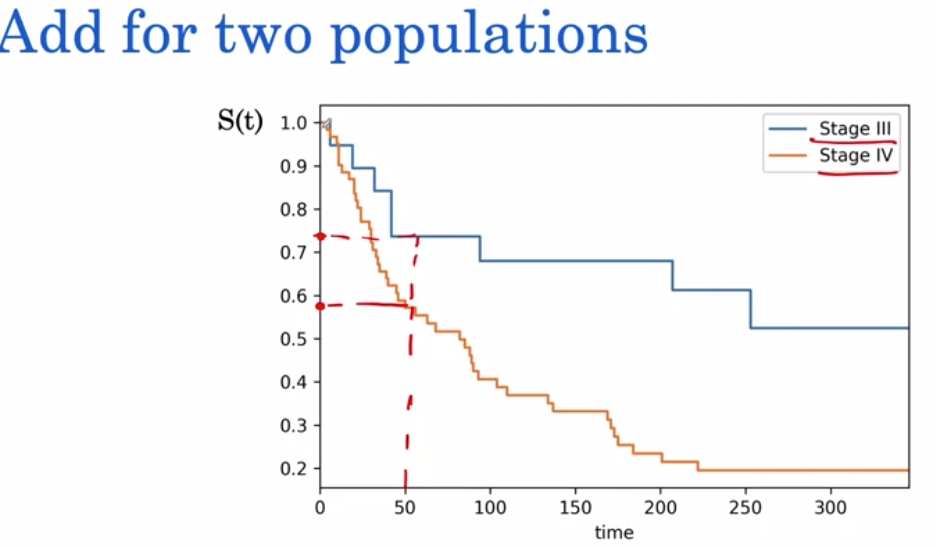

The Kaplan Meier estimate of survival probability is:

$$
S(t) = \prod_{t_i \leq t} (1 - \frac{d_i}{n_i})
$$

- $t_i$ are the events observed in the dataset
- $d_i$ is the number of deaths at time $t_i$
- $n_i$ is the number of people who we know have survived up to time $t_i$.



In [10]:
df = pd.DataFrame({'Time': [3,3,2,2],
                   'Event': [0,1,0,1]
                  })
df

,Time,Event
0,3,0
1,3,1
2,2,0
3,2,1


#### Find Those Who Survived Up to Time $t_i$

If they survived up to time $t_i$,
- Their `Time` is either greater than $t_i$
- Or, their `Time` can be equal to $t_i$

In [ ]:
t_i = 2
df['Time'] >= t_i

You can use this to help you calculate $n_i$

#### Find Those Who Died at Time $t_i$

- If they died at $t_i$:
- Their `Event` value is 1.  
- Also, their `Time` should be equal to $t_i$

In [12]:
t_i = 2
(df['Event'] == 1) & (df['Time'] == t_i)

0    False
1    False
2    False
3     True
dtype: bool



You can use this to help you calculate $d_i$



Welcome to the third assignment of Course 2. In this assignment, we'll use Python to build some of the statistical models we learned this past week to analyze surivival estimates for a dataset of lymphoma patients. We'll also evaluate these models and interpret their outputs. Along the way, you will be learning about the following:

- Censored Data
- Kaplan-Meier Estimates
- Subgroup Analysis

In [ ]:
pip install lifelines

In [15]:
from lifelines.datasets import load_lymphoma


def load_data():
    df = load_lymphoma()
    df.loc[:, 'Event'] = df.Censor
    df = df.drop(['Censor'], axis=1)
    return df

In [17]:
import lifelines
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from lifelines import KaplanMeierFitter as KM
from lifelines.statistics import logrank_test

In [18]:
data = load_data()

In [19]:
print("data shape: {}".format(data.shape))
data.head()

data shape: (80, 3)


,Stage_group,Time,Event
0,1,6,1
1,1,19,1
2,1,32,1
3,1,42,1
4,1,42,1


The column `Time` states how long the patient lived before they died or were censored.

The column `Event` says whether a death was observed or not. `Event` is 1 if the event is observed (i.e. the patient died) and 0 if data was censored.

Censorship here means that the observation has ended without any observed event.
For example, let a patient be in a hospital for 100 days at most. If a patient dies after only 44 days, their event will be recorded as `Time = 44` and `Event = 1`. If a patient walks out after 100 days and dies 3 days later (103 days total), this event is not observed in our process and the corresponding row has `Time = 100` and `Event = 0`. If a patient survives for 25 years after being admitted, their data for are still `Time = 100` and `Event = 0`.

#### Censored Data

We can plot a histogram of the survival times to see in general how long cases survived before censorship or events.

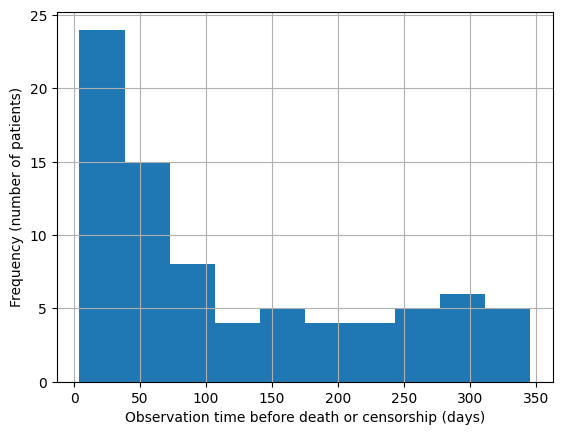

In [20]:
data.Time.hist();
plt.xlabel("Observation time before death or censorship (days)");
plt.ylabel("Frequency (number of patients)");
# Note that the semicolon at the end of the plotting line
# silences unnecessary textual output - try removing it
# to observe its effect

to compute the fraction ($\in [0, 1]$) of observations which were censored.

In [21]:
data[data["Event"]==0]["Event"]

5     0
7     0
8     0
10    0
11    0
13    0
14    0
15    0
16    0
17    0
18    0
42    0
43    0
48    0
49    0
62    0
70    0
71    0
72    0
73    0
74    0
75    0
76    0
77    0
78    0
79    0
Name: Event, dtype: int64

In [23]:
# Summing up the 'Event' column will give you the number of observations where censorship has NOT occurred.

def frac_censored(df):
    """
    Return percent of observations which were censored.

    Args:
        df (dataframe): dataframe which contains column 'Event' which is
                        1 if an event occurred (death)
                        0 if the event did not occur (censored)
    Returns:
        frac_censored (float): fraction of cases which were censored.
    """
    result = 0.0

    result =len(df[df["Event"]==0]["Event"])/len(df)

    return result

In [24]:
print(frac_censored(data))

0.325


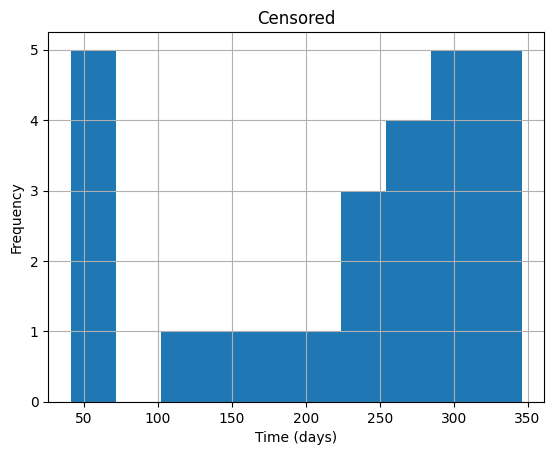

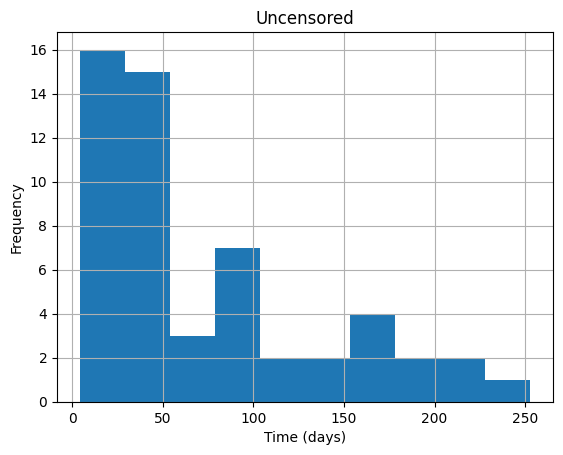

In [25]:
# Run the next cell to see the distributions of survival times for censored and uncensored examples.
df_censored = data[data.Event == 0]
df_uncensored = data[data.Event == 1]

df_censored.Time.hist()
plt.title("Censored")
plt.xlabel("Time (days)")
plt.ylabel("Frequency")
plt.show()

df_uncensored.Time.hist()
plt.title("Uncensored")
plt.xlabel("Time (days)")
plt.ylabel("Frequency")
plt.show()

## Survival Estimates

We'll now try to estimate the survival function:

$$
S(t) = P(T > t)
$$

To illustrate the strengths of Kaplan Meier, we'll start with a naive estimator of the above survival function. To estimate this quantity, we'll divide the number of people who we know lived past time $t$ by the number of people who were not censored before $t$.

Formally, let $i$ = 1, ..., $n$ be the cases, and let $t_i$ be the time when $i$ was censored or an event happened. Let $e_i= 1$ if an event was observed for $i$ and 0 otherwise. Then let $X_t = \{i : T_i > t\}$, and let $M_t = \{i : e_i = 1 \text{ or } T_i > t\}$. The estimator you will compute will be:

$$
\hat{S}(t) = \frac{|X_t|}{|M_t|}
$$

In [27]:
# Write a function to compute this estimate for arbitrary  t  in the cell below.
def naive_estimator(t, df):
    """
    Return naive estimate for S(t), the probability
    of surviving past time t. Given by number
    of cases who survived past time t divided by the
    number of cases who weren't censored before time t.

    Args:
        t (int): query time
        df (dataframe): survival data. Has a Time column,
                        which says how long until that case
                        experienced an event or was censored,
                        and an Event column, which is 1 if an event
                        was observed and 0 otherwise.
    Returns:
        S_t (float): estimator for survival function evaluated at t.
    """
    S_t = 0.0

    X_t = len(df[df["Time"]>t])
    M_t = len(df[(df["Time"]>t) | (df["Event"]==1)])
    S_t = X_t/M_t

    return S_t

In [28]:
print("Test Cases")

sample_df = pd.DataFrame(columns = ["Time", "Event"])
sample_df.Time = [5, 10, 15]
sample_df.Event = [0, 1, 0]
print("Sample dataframe for testing code:")
print(sample_df)
print("\n")

print("Test Case 1: S(3)")
print("Output: {}, Expected: {}\n".format(naive_estimator(3, sample_df), 1.0))

print("Test Case 2: S(12)")
print("Output: {}, Expected: {}\n".format(naive_estimator(12, sample_df), 0.5))

print("Test Case 3: S(20)")
print("Output: {}, Expected: {}\n".format(naive_estimator(20, sample_df), 0.0))

# Test case 4
sample_df = pd.DataFrame({'Time': [5,5,10],
                          'Event': [0,1,0]
                         })
print("Test case 4: S(5)")
print(f"Output: {naive_estimator(5, sample_df)}, Expected: 0.5")

Test Cases
Sample dataframe for testing code:
   Time  Event
0     5      0
1    10      1
2    15      0


Test Case 1: S(3)
Output: 1.0, Expected: 1.0

Test Case 2: S(12)
Output: 0.5, Expected: 0.5

Test Case 3: S(20)
Output: 0.0, Expected: 0.0

Test case 4: S(5)
Output: 0.5, Expected: 0.5


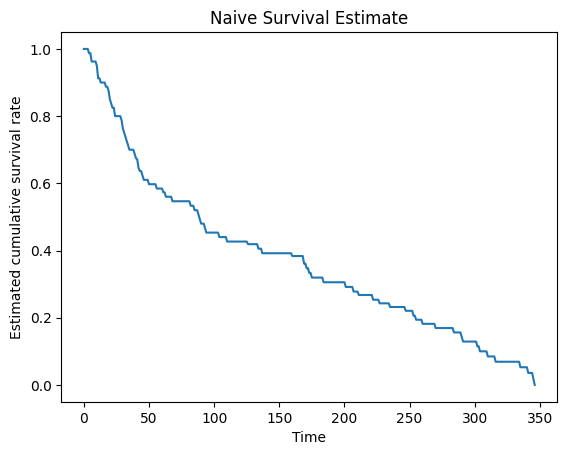

In [30]:
# we will plot the naive estimator using the real data up to the maximum time in the dataset.

max_time = data.Time.max()
x = range(0, max_time+1)
y = np.zeros(len(x))
for i, t in enumerate(x):
    y[i] = naive_estimator(t, data)

plt.plot(x, y)
plt.title("Naive Survival Estimate")
plt.xlabel("Time")
plt.ylabel("Estimated cumulative survival rate")
plt.show()


Next let's compare this with the Kaplan Meier estimate. In the cell below, write a function that computes the Kaplan Meier estimate of $S(t)$ at every distinct time in the dataset.

Recall the Kaplan-Meier estimate:

$$
S(t) = \prod_{t_i \leq t} (1 - \frac{d_i}{n_i})
$$

where $t_i$ are the events observed in the dataset and $d_i$ is the number of deaths at time $t_i$ and $n_i$ is the number of people who we know have survived up to time $t_i$.

In [32]:
def HomemadeKM(df):
    """
    Return KM estimate evaluated at every distinct
    time (event or censored) recorded in the dataset.
    Event times and probabilities should begin with
    time 0 and probability 1.

    Example:

    input:

         Time  Censor
    0     5       0
    1    10       1
    2    15       0

    correct output:

    event_times: [0, 5, 10, 15]
    S: [1.0, 1.0, 0.5, 0.5]

    Args:
        df (dataframe): dataframe which has columns for Time
                          and Event, defined as usual.

    Returns:
        event_times (list of ints): array of unique event times
                                      (begins with 0).
        S (list of floats): array of survival probabilites, so that
                            S[i] = P(T > event_times[i]). This
                            begins with 1.0 (since no one dies at time
                            0).
    """
    # individuals are considered to have survival probability 1
    # at time 0
    event_times = [0]
    p = 1.0
    S = [p]


    # get collection of unique observed event times
    observed_event_times = df["Time"].unique()

    # sort event times
    observed_event_times = sorted(observed_event_times)

    # iterate through event times
    for t in observed_event_times:

        # compute n_t, number of people who survive to time t
        n_t = len(df[df["Time"]>=t])

        # compute d_t, number of people who die at time t
        d_t = len(df[(df["Time"]==t) & (df["Event"]==1)])

        # update p
        p = p * (1 - (d_t/n_t))
        S.append(p)
        event_times.append(t)

        # update S and event_times (ADD code below)
        # hint: use append

    return event_times, S

In [33]:
print("TEST CASES:\n")


print("Test Case 1\n")

print("Test DataFrame:")
sample_df = pd.DataFrame(columns = ["Time", "Event"])
sample_df.Time = [5, 10, 15]
sample_df.Event = [0, 1, 0]
print(sample_df.head())
print("\nOutput:")
x, y = HomemadeKM(sample_df)
print("Event times: {}, Survival Probabilities: {}".format(x, y))
print("\nExpected:")
print("Event times: [0, 5, 10, 15], Survival Probabilities: [1.0, 1.0, 0.5, 0.5]")

print("\nTest Case 2\n")

print("Test DataFrame:")

sample_df = pd.DataFrame(columns = ["Time", "Event"])
sample_df.loc[:, "Time"] = [2, 15, 12, 10, 20]
sample_df.loc[:, "Event"] = [0, 0, 1, 1, 1]
print(sample_df.head())
print("\nOutput:")
x, y = HomemadeKM(sample_df)
print("Event times: {}, Survival Probabilities: {}".format(x, y))
print("\nExpected:")
print("Event times: [0, 2, 10, 12, 15, 20], Survival Probabilities: [1.0, 1.0, 0.75, 0.5, 0.5, 0.0]")

TEST CASES:

Test Case 1

Test DataFrame:
   Time  Event
0     5      0
1    10      1
2    15      0

Output:
Event times: [0, 5, 10, 15], Survival Probabilities: [1.0, 1.0, 0.5, 0.5]

Expected:
Event times: [0, 5, 10, 15], Survival Probabilities: [1.0, 1.0, 0.5, 0.5]

Test Case 2

Test DataFrame:
   Time  Event
0     2      0
1    15      0
2    12      1
3    10      1
4    20      1

Output:
Event times: [0, 2, 10, 12, 15, 20], Survival Probabilities: [1.0, 1.0, 0.75, 0.5, 0.5, 0.0]

Expected:
Event times: [0, 2, 10, 12, 15, 20], Survival Probabilities: [1.0, 1.0, 0.75, 0.5, 0.5, 0.0]


<ipython-input-33-1f0bf00da9b8>:23: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sample_df.loc[:, "Event"] = [0, 0, 1, 1, 1]


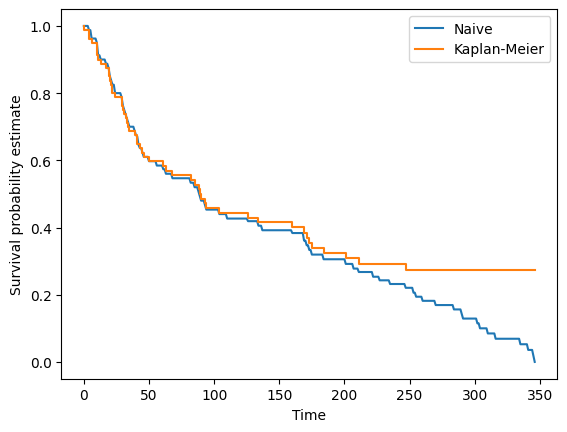

In [35]:
# Now let's plot the two against each other on the data to see the difference.

max_time = data.Time.max()
x = range(0, max_time+1)
y = np.zeros(len(x))
for i, t in enumerate(x):
    y[i] = naive_estimator(t, data)

plt.plot(x, y, label="Naive")

x, y = HomemadeKM(data)
plt.step(x, y, label="Kaplan-Meier")
plt.xlabel("Time")
plt.ylabel("Survival probability estimate")
plt.legend()
plt.show()

What differences do you observe between the naive estimator and Kaplan-Meier estimator? Do any of our earlier explorations of the dataset help to explain these differences?

#### Subgroup Analysis
We see that along with Time and Censor, we have a column called Stage_group.

A value of 1 in this column denotes a patient with stage III cancer
A value of 2 denotes stage IV.
We want to compare the survival functions of these two groups.

This time we'll use the KaplanMeierFitter class from lifelines. Run the next cell to fit and plot the Kaplan Meier curves for each group.

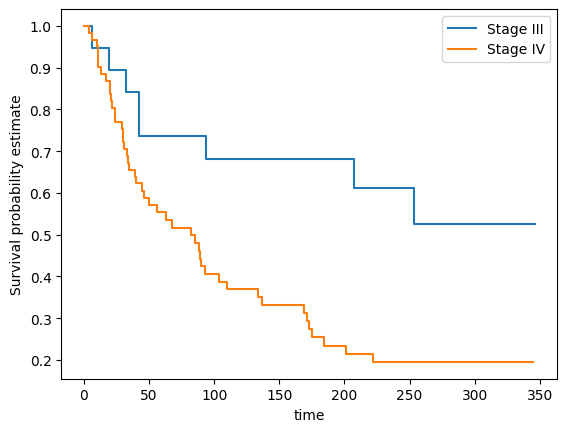

In [36]:
S1 = data[data.Stage_group == 1]
km1 = KM()
km1.fit(S1.loc[:, 'Time'], event_observed = S1.loc[:, 'Event'], label = 'Stage III')

S2 = data[data.Stage_group == 2]
km2 = KM()
km2.fit(S2.loc[:, "Time"], event_observed = S2.loc[:, 'Event'], label = 'Stage IV')

ax = km1.plot(ci_show=False)
km2.plot(ax = ax, ci_show=False)
plt.xlabel('time')
plt.ylabel('Survival probability estimate')
plt.savefig('two_km_curves', dpi=300)

In [38]:
# Let's compare the survival functions at 90, 180, 270, and 360 days
survivals = pd.DataFrame([90, 180, 270, 360], columns = ['time'])
survivals.loc[:, 'Group 1'] = km1.survival_function_at_times(survivals['time']).values
survivals.loc[:, 'Group 2'] = km2.survival_function_at_times(survivals['time']).values
survivals

,time,Group 1,Group 2
0,90,0.736842,0.424529
1,180,0.680162,0.254066
2,270,0.524696,0.195436
3,360,0.524696,0.195436


This makes clear the difference in survival between the Stage III and IV cancer groups in the dataset.

#### Log-Rank Test

To say whether there is a statistical difference between the survival curves we can run the log-rank test. This test tells us the probability that we could observe this data if the two curves were the same. The derivation of the log-rank test is somewhat complicated, but luckily `lifelines` has a simple function to compute it.

Run the next cell to compute a p-value using `lifelines.statistics.logrank_test`.

In [39]:
def logrank_p_value(group_1_data, group_2_data):
    result = logrank_test(group_1_data.Time, group_2_data.Time,
                          group_1_data.Event, group_2_data.Event)
    return result.p_value

logrank_p_value(S1, S2)

0.009588929834755544

If everything is correct, you should see a p value of less than 0.05, which indicates that the difference in the curves is indeed statistically significant.